In [45]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [46]:
# K =3
mu = 0
sigma = 1
theta = np.random.normal(mu, sigma, 3)

In [47]:
theta

array([ 0.41819709, -0.45668551,  0.66845521])

In [48]:

mean = 0
std = 2
X_vc = np.random.normal(mean, std, size = (500,3))
X_c = np.random.normal(mean, std, size = (100,3))
X_Costly = np.random.normal(mean, std, size = (2,3))

In [49]:
epsilon1 = np.random.normal(0 , 0.31, 500).reshape(500,1)
epsilon2 = np.random.normal(0 , 0.31, 100).reshape(100,1)
epsilon3 = np.random.normal(0 , 0.31, 2).reshape(2,1)

In [50]:
epsilon1.shape

(500, 1)

In [51]:
theta = theta.reshape(3,1)

In [52]:
y1 = X_vc@theta + epsilon1
y2 = X_c@theta + epsilon2
y3 = X_Costly@theta + epsilon3

In [53]:
lr = LinearRegression()
ridge = Ridge()

In [54]:
lr.fit(X_vc, y1)

LinearRegression()

In [55]:
theta_1 = lr.coef_

In [56]:
theta_1

array([[ 0.41895841, -0.46955127,  0.6406552 ]])

In [57]:
lr.fit(X_c, y2)

LinearRegression()

In [58]:
theta_2 = lr.coef_
theta_2

array([[ 0.40250287, -0.45075557,  0.66124276]])

In [59]:
lr.fit(X_Costly, y3)

LinearRegression()

In [60]:
theta_3 = lr.coef_
theta_3

array([[0.54310016, 0.02982038, 0.21231012]])

In [61]:
dist1 =  np.linalg.norm(theta - theta_1)
dist2 =  np.linalg.norm(theta - theta_2)
dist3 =  np.linalg.norm(theta - theta_3)
dist1

2.0412594205748986

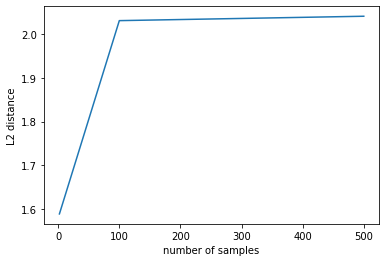

In [66]:
samples = np.array([2, 100, 500])
l2 = np.array([dist3, dist2, dist1])
plt.plot(samples, l2)
plt.xlabel("number of samples")
plt.ylabel('L2 distance')
plt.show()

In [69]:
lambda_parameter = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 1, 10]
dist = []
for i in range(0, 8):
    ridge = Ridge(alpha = lambda_parameter[i])
    ridge.fit(X_vc, y1)
    theta_ = ridge.coef_
    dist.append(np.linalg.norm(theta - theta_))

In [70]:
dist

[2.041254441383742,
 2.041249462261896,
 2.0412395042261338,
 2.0412195889862894,
 2.0411797618330456,
 2.041100120830114,
 2.0407618443494915,
 2.0363146454018866]

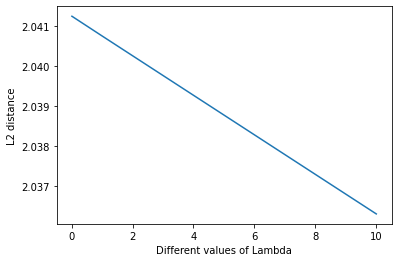

In [71]:
plt.plot(lambda_parameter, dist)
plt.xlabel("Different values of Lambda")
plt.ylabel('L2 distance')
plt.show()